# NoteBook for Heart Disease Detection

## This Notebook mainly contains the following:
**PART ONE: Basic Exploratory Data Analysis(EDA)**

**PART TWO: Applying Supervised ML Algorithms: Naive Bayes, Decision Trees, KNN and SVM**

**PART THREE: A brief discussion from PART TWO**

**PART FOUR: Ensemble Modeling**                

**PART FIVE: Applying one of clustering algorithms to identify the subgroups among heart disease patients**

### About Heart Disease Dataset:abel)

One of the impactful processes in every data mining problem is data selection, so we will use the University of
California, Irvine (UCI) Cleveland heart Disease dataset, which is clean data and contains 14 attributes the diagnosis
(predicted target is included); also it has 303 instances, gathered in 1988 from Cleveland Clinic Foundation.
Cleveland Heart Disease Dataset from the University of California, Irvine Repository is real data and has patient
records. The information of the attributes as shown in Table1, and there are 13 independent attributes, and one target/
dependent (label)

### PART ONE: Basic Exploratory Data Analysis(EDA)


In [15]:
# importing necessary libraries 
library(ggplot2)
library(dplyr)
library(GGally)
options(repr.plot.res=175)

In [4]:
#Reading the dataset
df<-read.csv("D:/mohammed/UNI/3-Third year/2-Second semster/Macheine Learning/Tasks/Heart_Disease .csv")

In [5]:
head(df,n=10)

,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,Target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,0,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,0,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2,0,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0,0,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1,2,1


In [6]:
# <-- Getting to know the structure of the data -->
# Number of columns and rows

paste("Number of columns  : ",ncol(df))
paste("Number of rows  : ",nrow(df))


[1] "Number of columns  :  14"

[1] "Number of rows  :  303"

In [7]:
# Attributes Names and Data Types
lapply(df,class)

$age
[1] "integer"

$sex
[1] "integer"

$cp
[1] "integer"

$tbp
[1] "integer"

$chol
[1] "integer"

$fbs
[1] "integer"

$rstcg
[1] "integer"

$thlch
[1] "integer"

$exng
[1] "integer"

$opeak
[1] "numeric"

$slope
[1] "integer"

$ca
[1] "integer"

$thal
[1] "integer"

$Target
[1] "integer"

If we look to the unique values of the atrributes in the data set, we could find that some of them are **Catogerical Variables** in origin,but Catogeries are represented by using Integer numbers

##### -The Catogerical Variables are:
**sex,cp,fbs,rstcg,exng,slope,ca,thal and Target**

As preprocessing phase the Catogerical Variables are converted from **"integer"** to **"factor"** data type


In [11]:
#Looking for unique values for each attribute 
sapply(df,unique)

$age
 [1] 63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55 61
[26] 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$tbp
 [1] 145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170 155
[20] 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174 148 178
[39] 158 192 129 144 123 136 146 106 156 154 114 164

$chol
  [1] 233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 [19] 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 [37] 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 [55] 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 [73] 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 [91] 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
[109] 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
[127] 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 311
[145] 278 342 169 187 157 176 241 131

$fbs
[1] 1 0

$rstcg
[1] 2 0 1

$thlch
 [1] 150 108 129 187 172 178 160 163 147 155 148 153 142 173 162 174 168 139 171
[20] 144 132 158 114 151 161 179 120 112 137 157 169 165 123 128 152 140 188 109
[39] 125 131 170 113  99 177 141 180 111 143 182 156 115 149 145 146 175 186 185
[58] 159 130 190 136  97 127 154 133 126 202 103 166 164 184 124 122  96 138  88
[77] 105 194 195 106 167  95 192 117 121 116  71 118 181 134  90

$exng
[1] 0 1

$opeak
 [1] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.0 0.5 1.6 1.0 1.2 0.2 1.8 3.2
[20] 2.4 2.0 2.5 2.2 2.8 3.0 3.4 6.2 4.0 5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1 3.8 0.7
[39] 0.3 4.4

$slope
[1] 3 2 1

$ca
[1] 0 3 2 1

$thal
[1] 1 0 2

$Target
[1] 0 1

In [51]:
## <--converting from "integer" to "factor" data type-->
df2<-lapply(select(df,c(sex,cp,fbs,rstcg,rstcg,exng,slope,ca,thal,Target)),as.factor)
df2<-as.data.frame(df2)
df2<-mutate(df2,
      age=df$age,
      tbp=df$tbp,
      chol=df$chol,
      thlch=df$thlch,
      opeak=df$opeak
      )
#Reordering the Atrributes in df2
df2<-select(df2,age,sex,cp,tbp,chol,fbs,rstcg,thlch,exng,opeak,slope,ca,thal,Target)
df<-df2
is.factor(df$cp)


[1] TRUE

#### Checking for any missing values

In [53]:
any(is.na(df))

[1] FALSE

**It seems that there is no any missing values in the dataset;so we will need just one visualization process for data exploration**

#### Data Visualization:

Data Visualization will be done based on the datatype of the variables.
In **Heart Disease** dataset mainly there are two datatype:

**1-Categorical Datatype:** Bar chart,Pie chart will be used for Categorical Datatype

**2-Continuous Datatype:** Histgrame,Boxplots for Continuous Datatype

Another considration in data Visualization is:

**1-Variation:** which consider plotting the only one varaible

**2-Covariation:** plotting the relation between two or more variables

#### Variation:
Variation is the tendency of the values of a variable to change from
measurement to measurement.

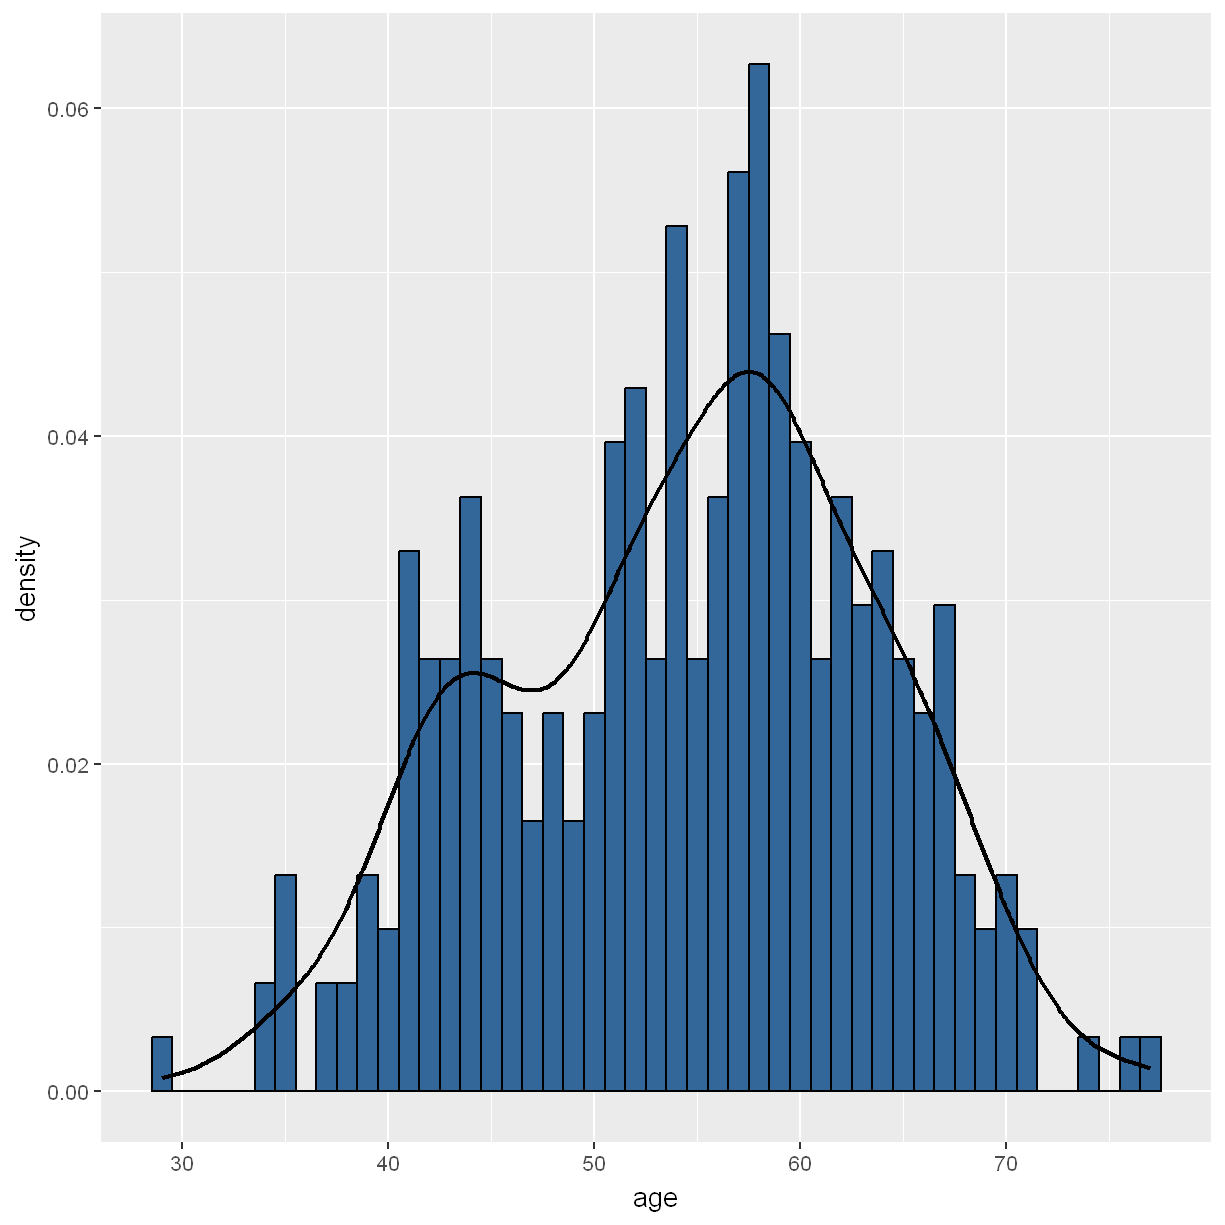

In [166]:
#Variation:age
ggplot(data=df)+
        geom_histogram(mapping=aes(x=age,y=after_stat(density)),binwidth=1,fill= "#336699",color="black")+
          geom_density(mapping=aes(x=age),linewidth=0.85)


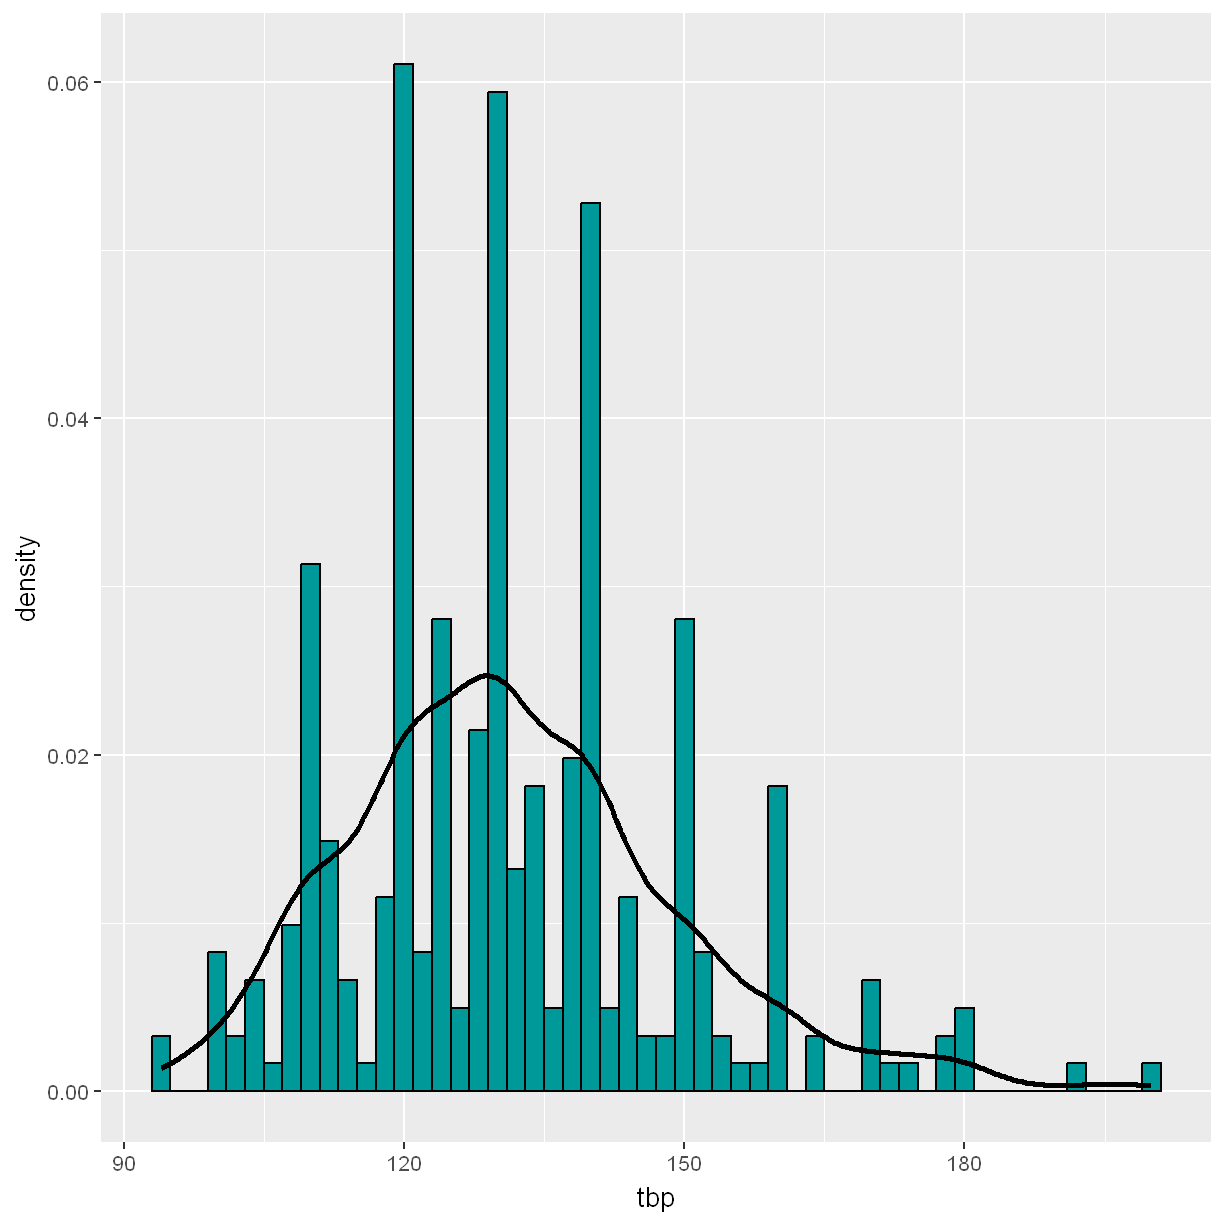

In [147]:
# Variation:tbp
ggplot(data=df)+
        geom_histogram(mapping=aes(x=tbp,y=after_stat(density)),binwidth=2,fill= "#009999",color="black")+
          geom_density(mapping=aes(x=tbp),linewidth=1)

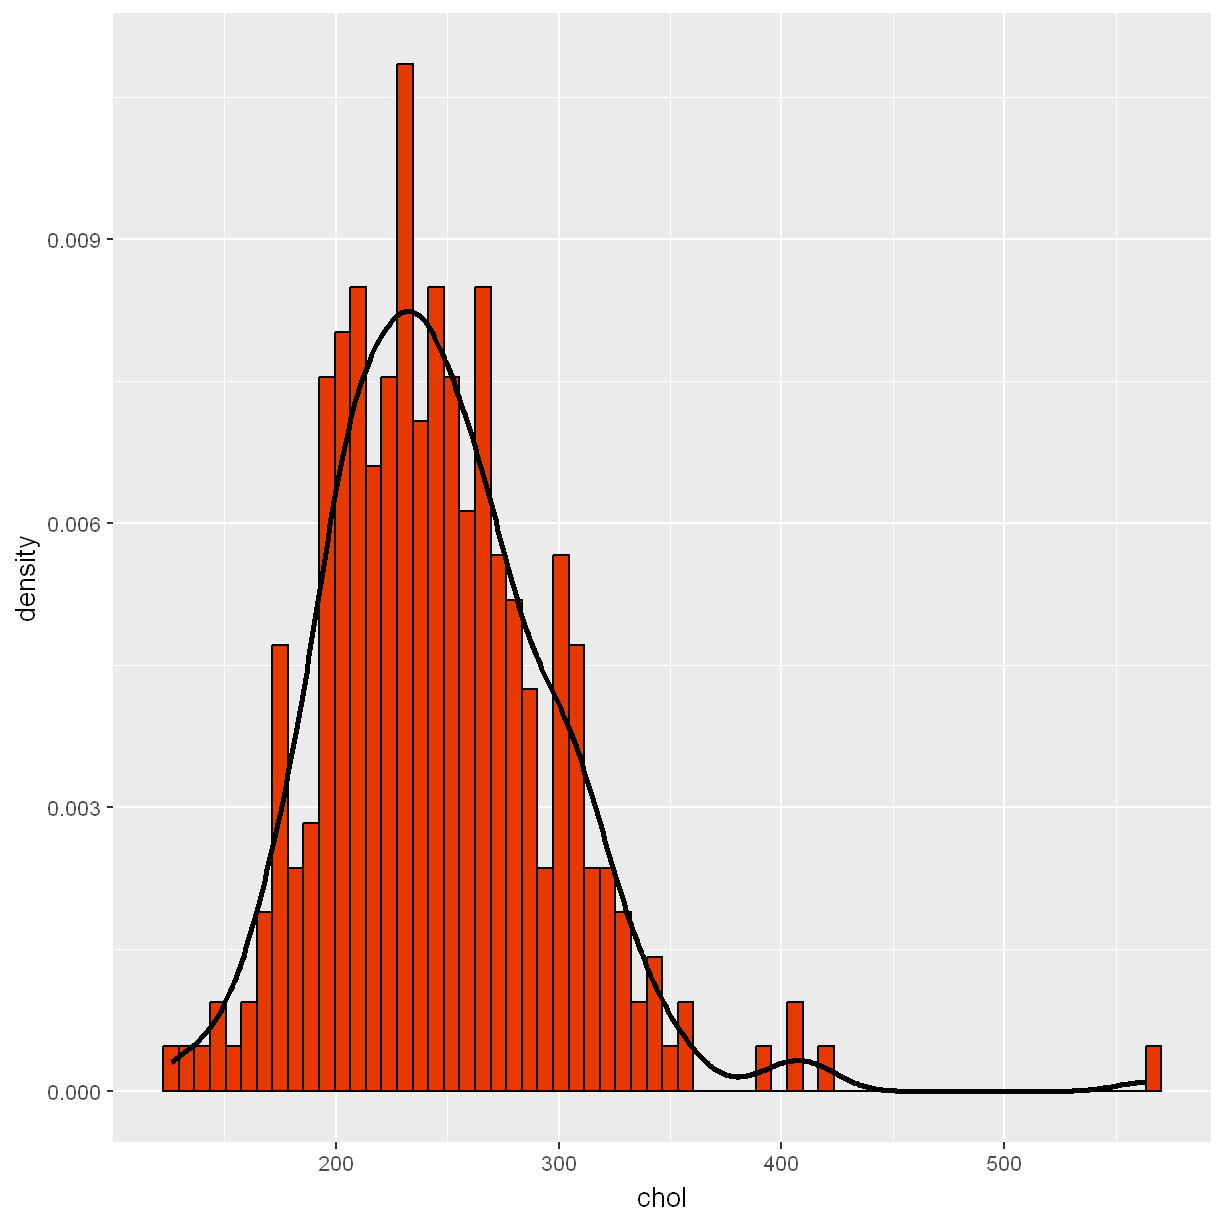

In [175]:
# Variation:chol
ggplot(data=df)+
        geom_histogram(mapping=aes(x=chol,y=after_stat(density)),binwidth=7,fill= "#e63900",color="black")+
          geom_density(mapping=aes(x=chol),linewidth=1)



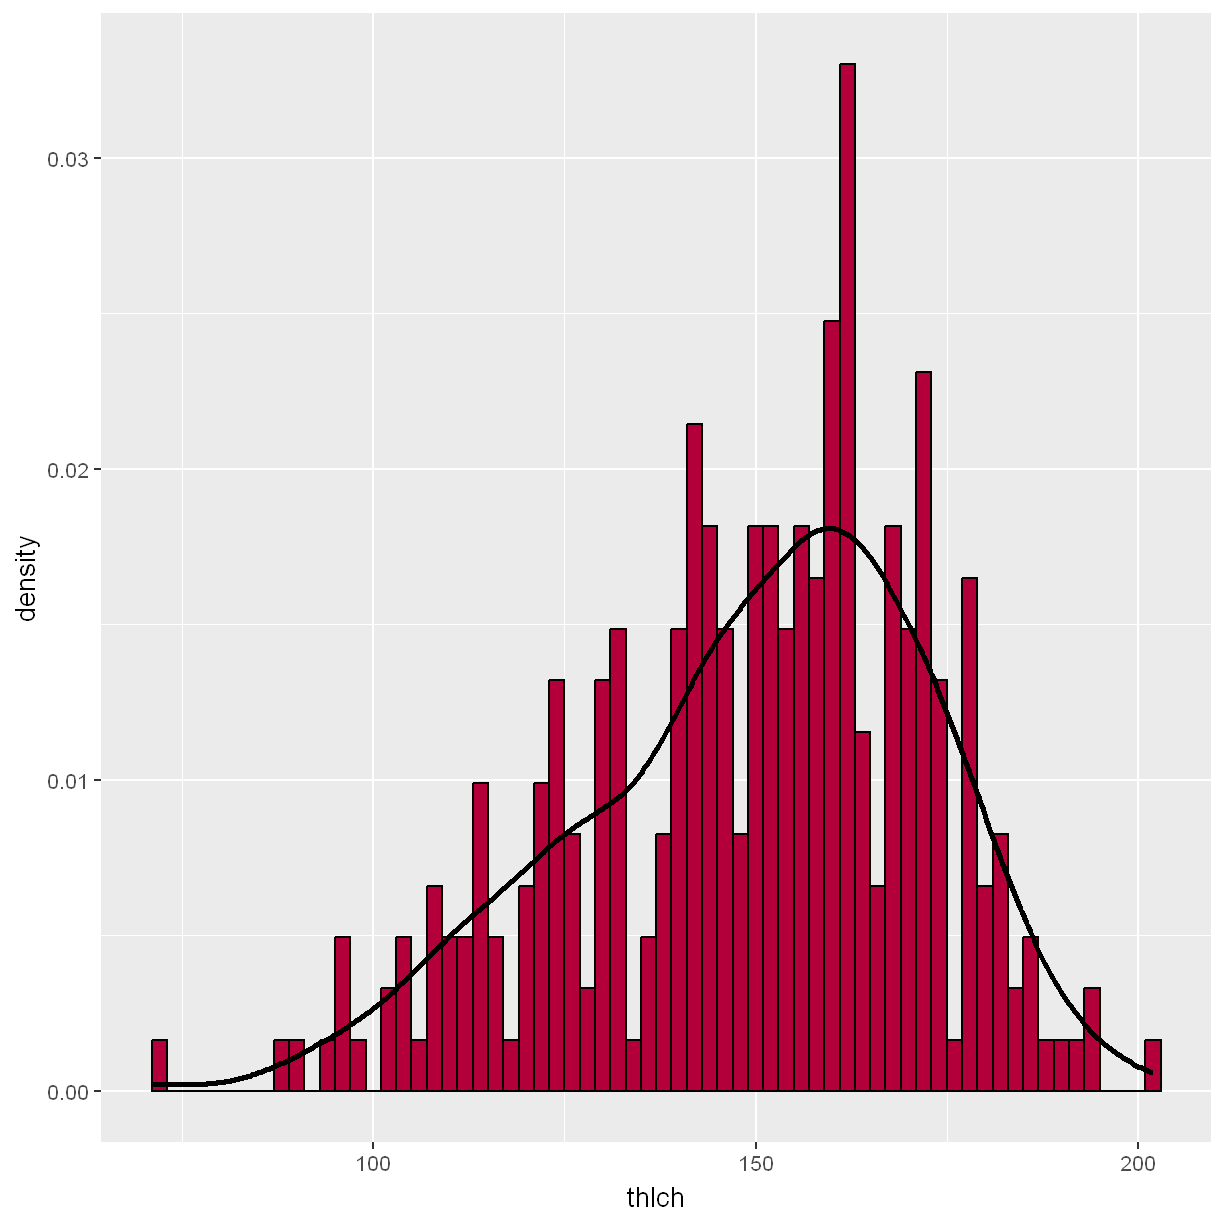

In [176]:
# Variation:thlch
ggplot(data=df)+
        geom_histogram(mapping=aes(x=thlch,y=after_stat(density)),binwidth=2,fill= "#b3003b",color="black")+
          geom_density(mapping=aes(x=thlch),linewidth=1)

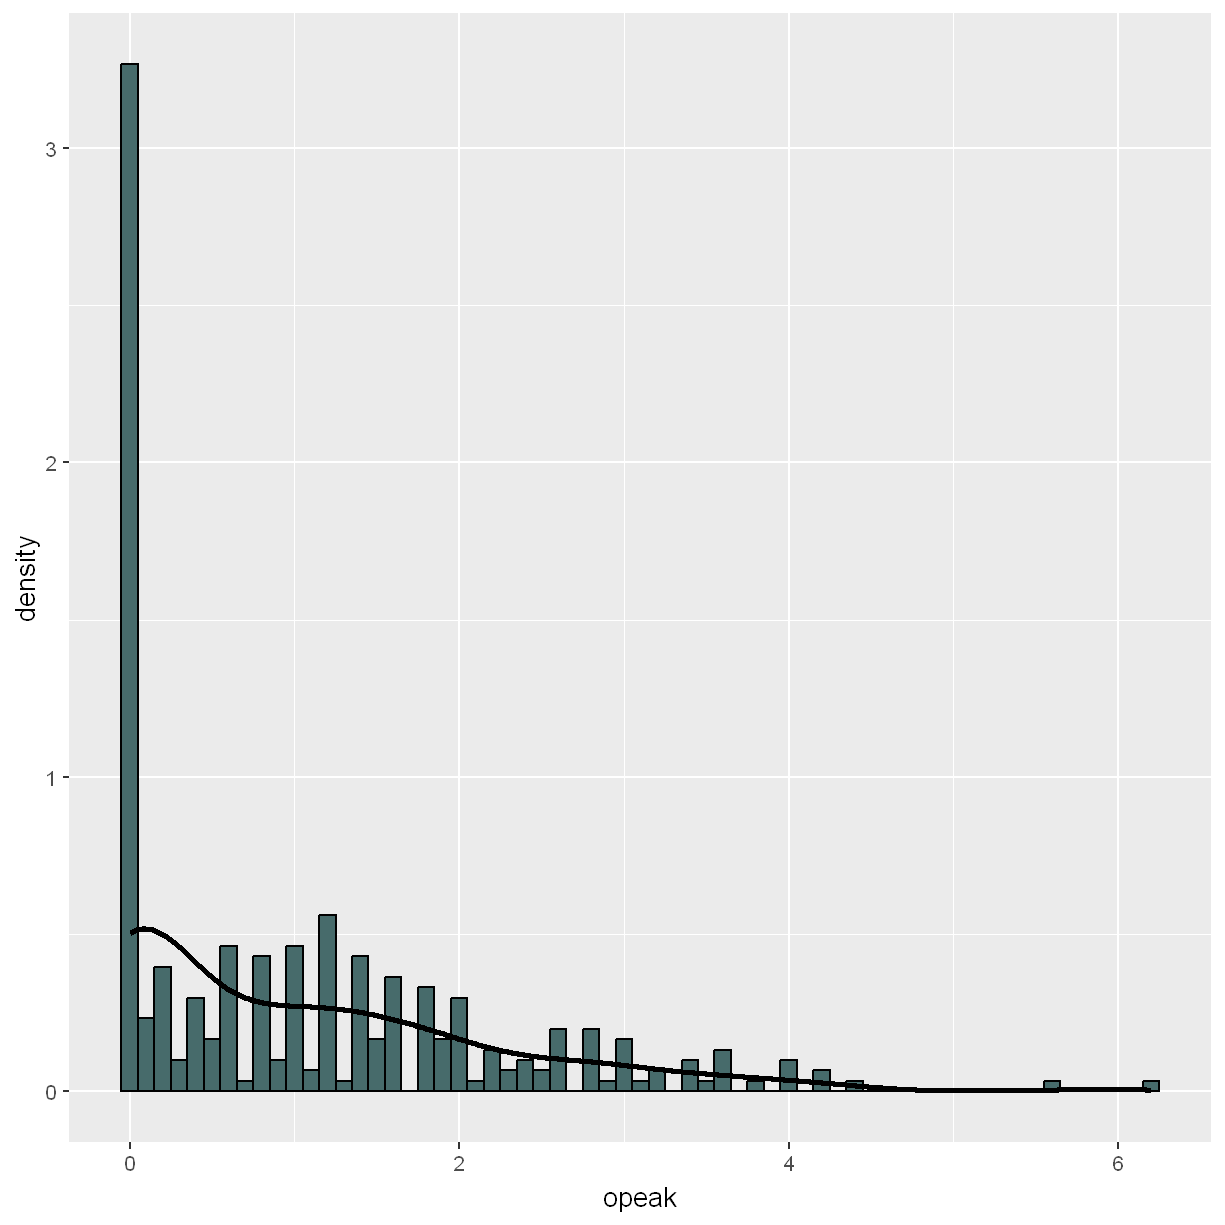

In [196]:
# Variation:opeak
ggplot(data=df)+
        geom_histogram(mapping=aes(x=opeak,y=after_stat(density)),binwidth=0.1,fill= "#476b6b",color="black")+
            geom_density(mapping=aes(x=opeak),linewidth=1)


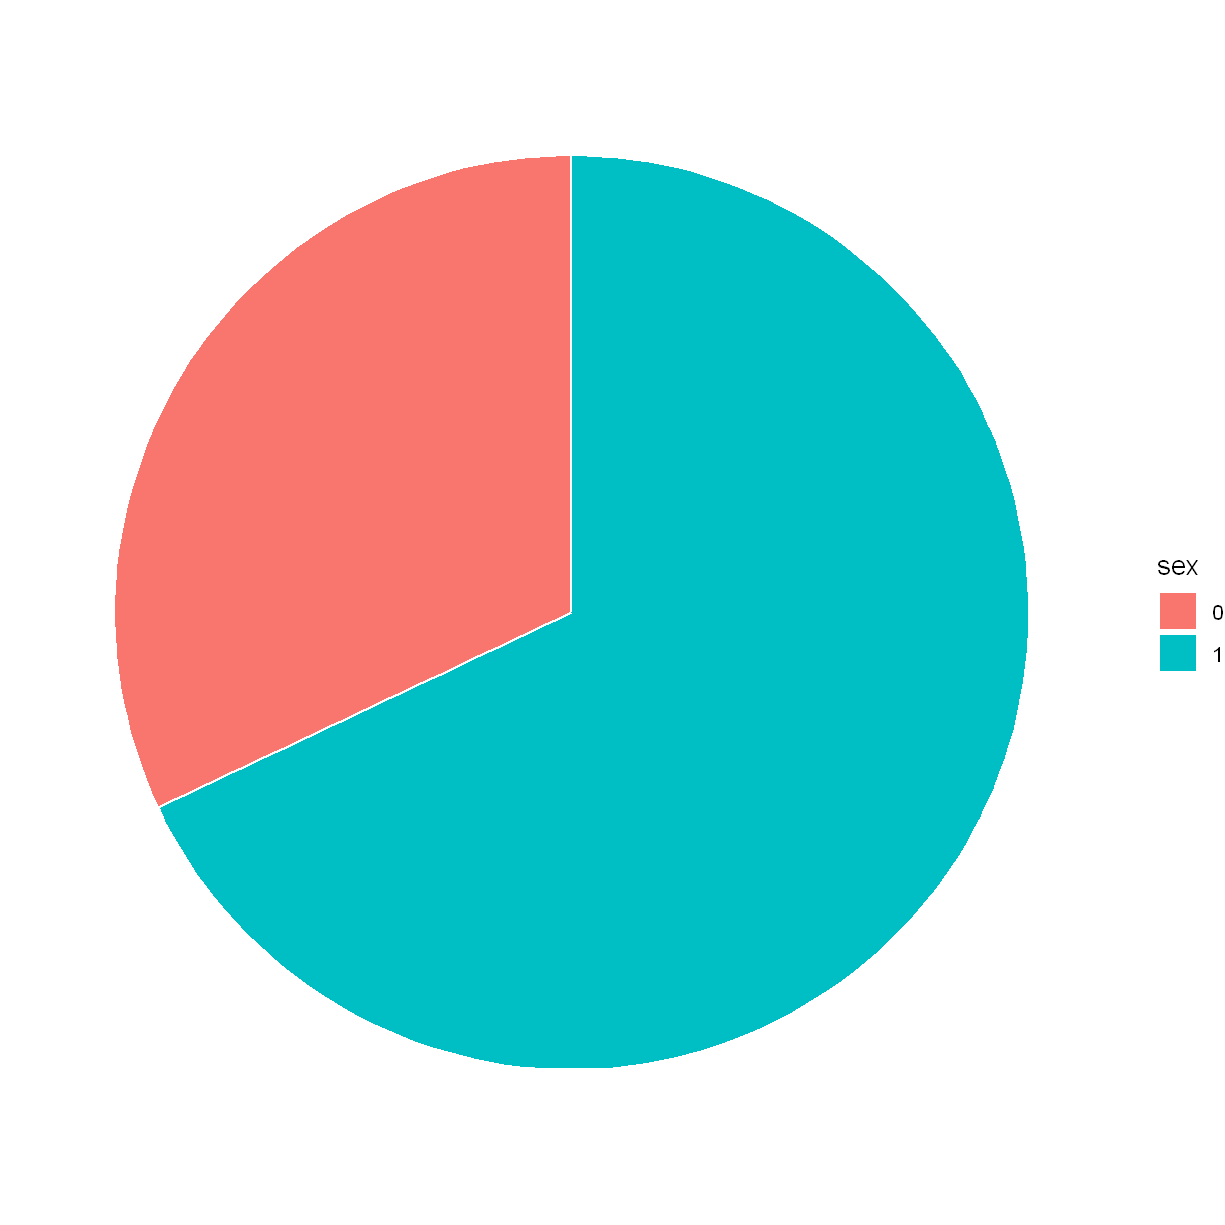

In [382]:
# Variation:sex
sex_count<-df%>%
    group_by(sex)%>%
        summarize(count=n())


ggplot(data=sex_count, aes(x="", y=count, fill=sex)) +
  geom_bar(stat="identity", width=1, color="white") +
      coord_polar("y", start=0) + 
        theme_void()
            

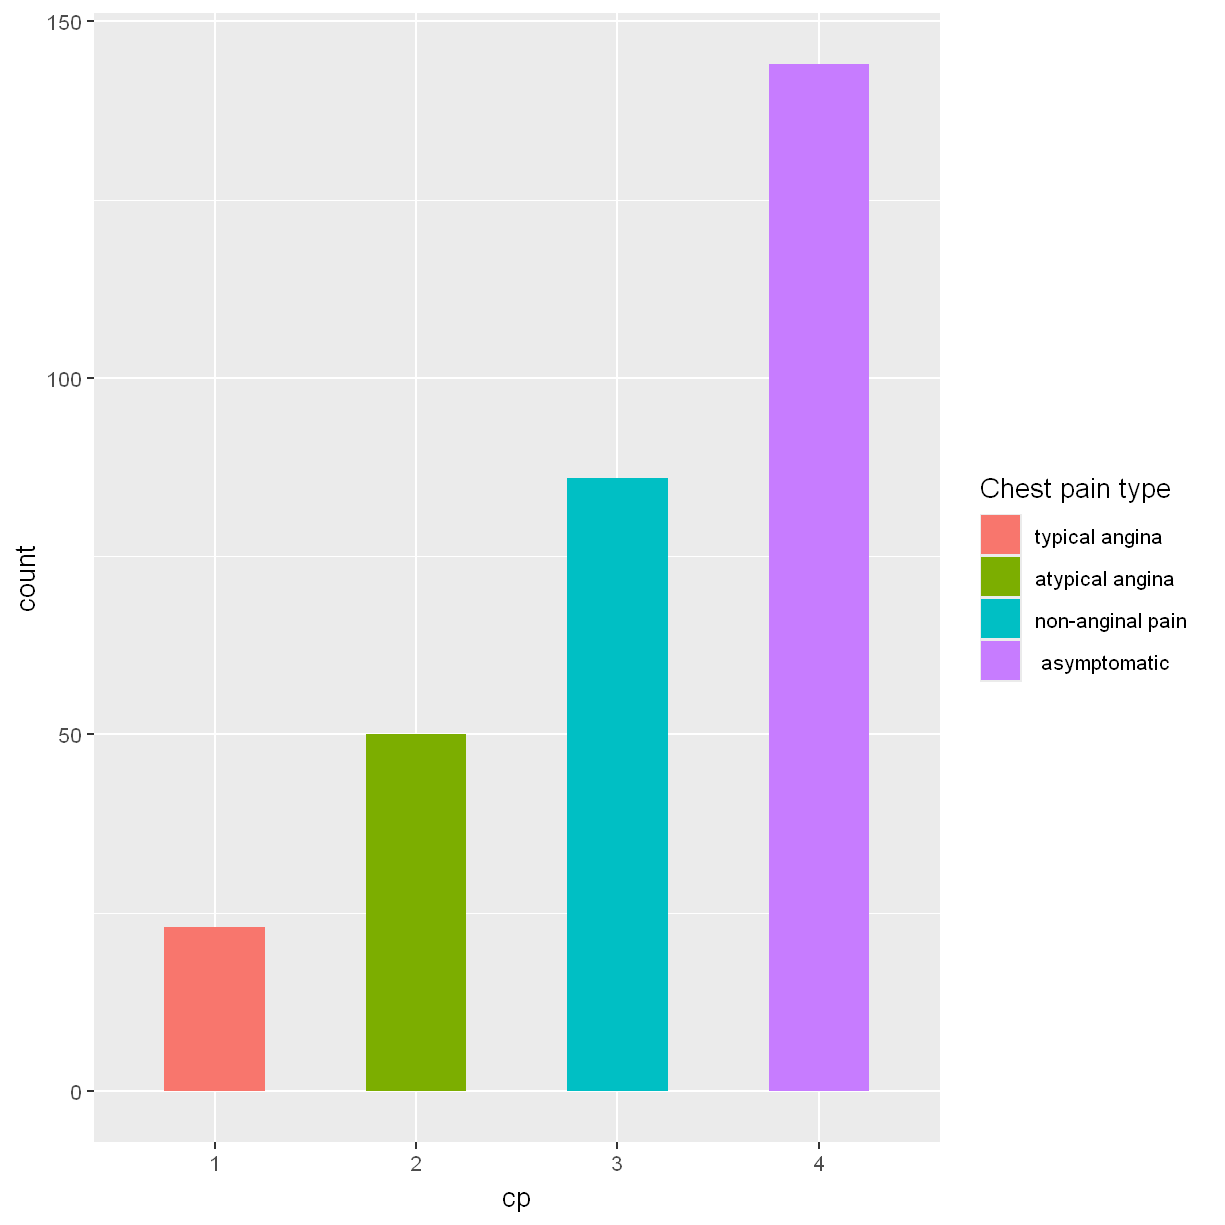

In [388]:
# Variation:cp
ggplot(data=df)+
    geom_bar(mapping=aes(x=cp,fill=cp),width=0.5)+
                labs(fill = "Chest pain type")+
                     scale_fill_discrete(labels=c("typical angina","atypical angina","non-anginal pain"," asymptomatic"))

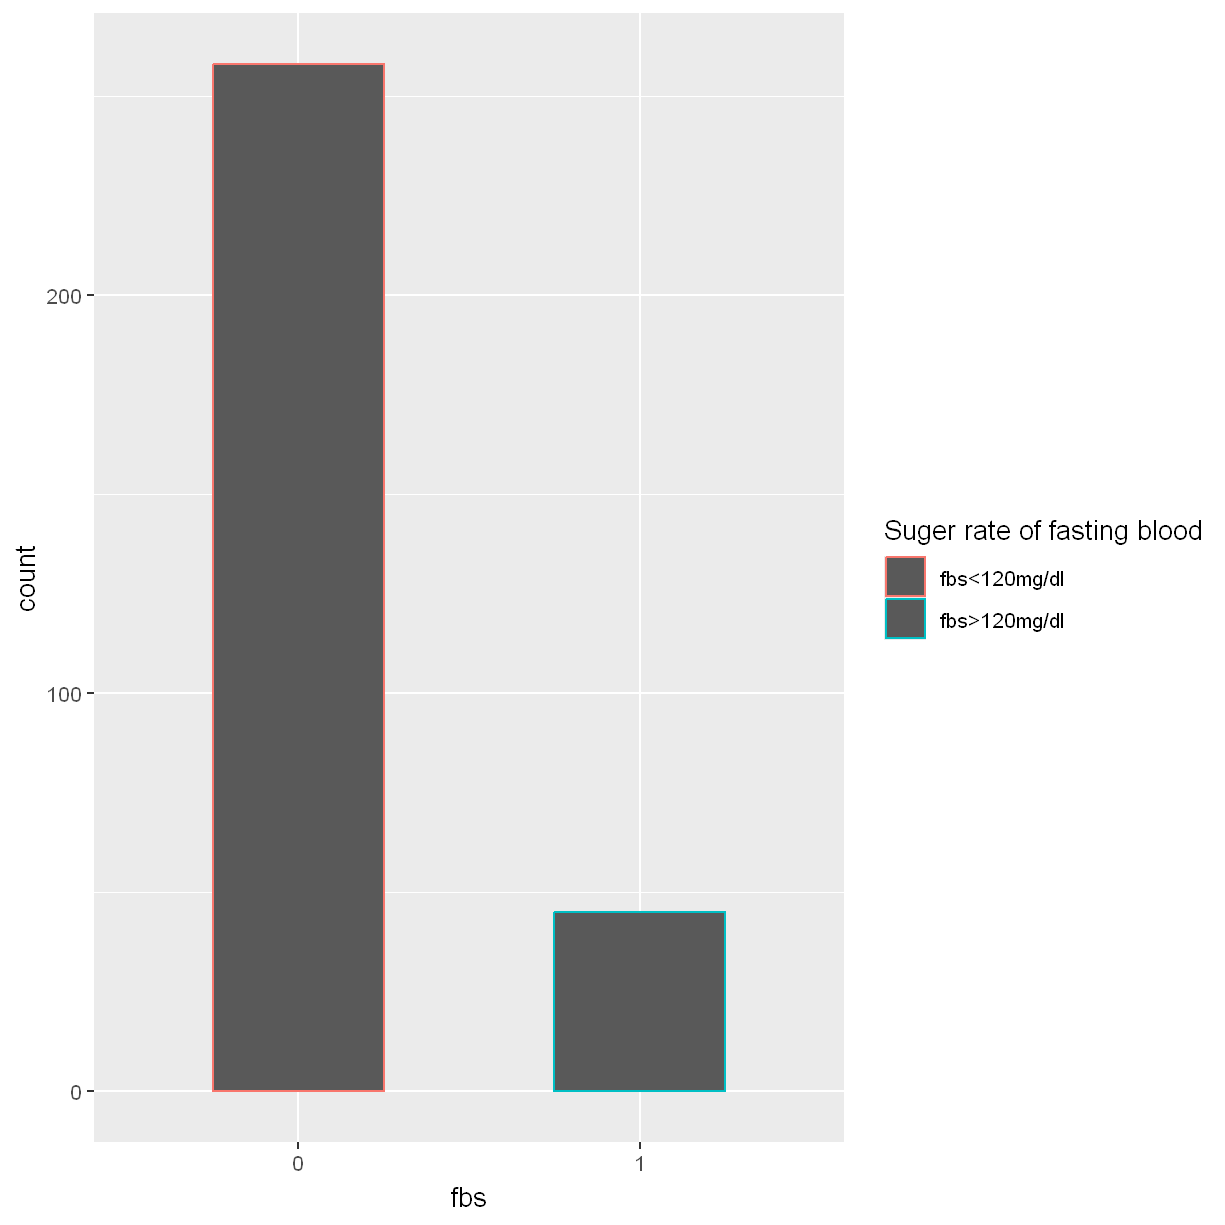

In [389]:
# Variation:fbs
ggplot(data=df)+
    geom_bar(mapping=aes(x=fbs,color=fbs),show.legend = TRUE,width=0.5)+
            labs(color = "Suger rate of fasting blood")+
                scale_color_discrete(labels=c("fbs<120mg/dl","fbs>120mg/dl"))


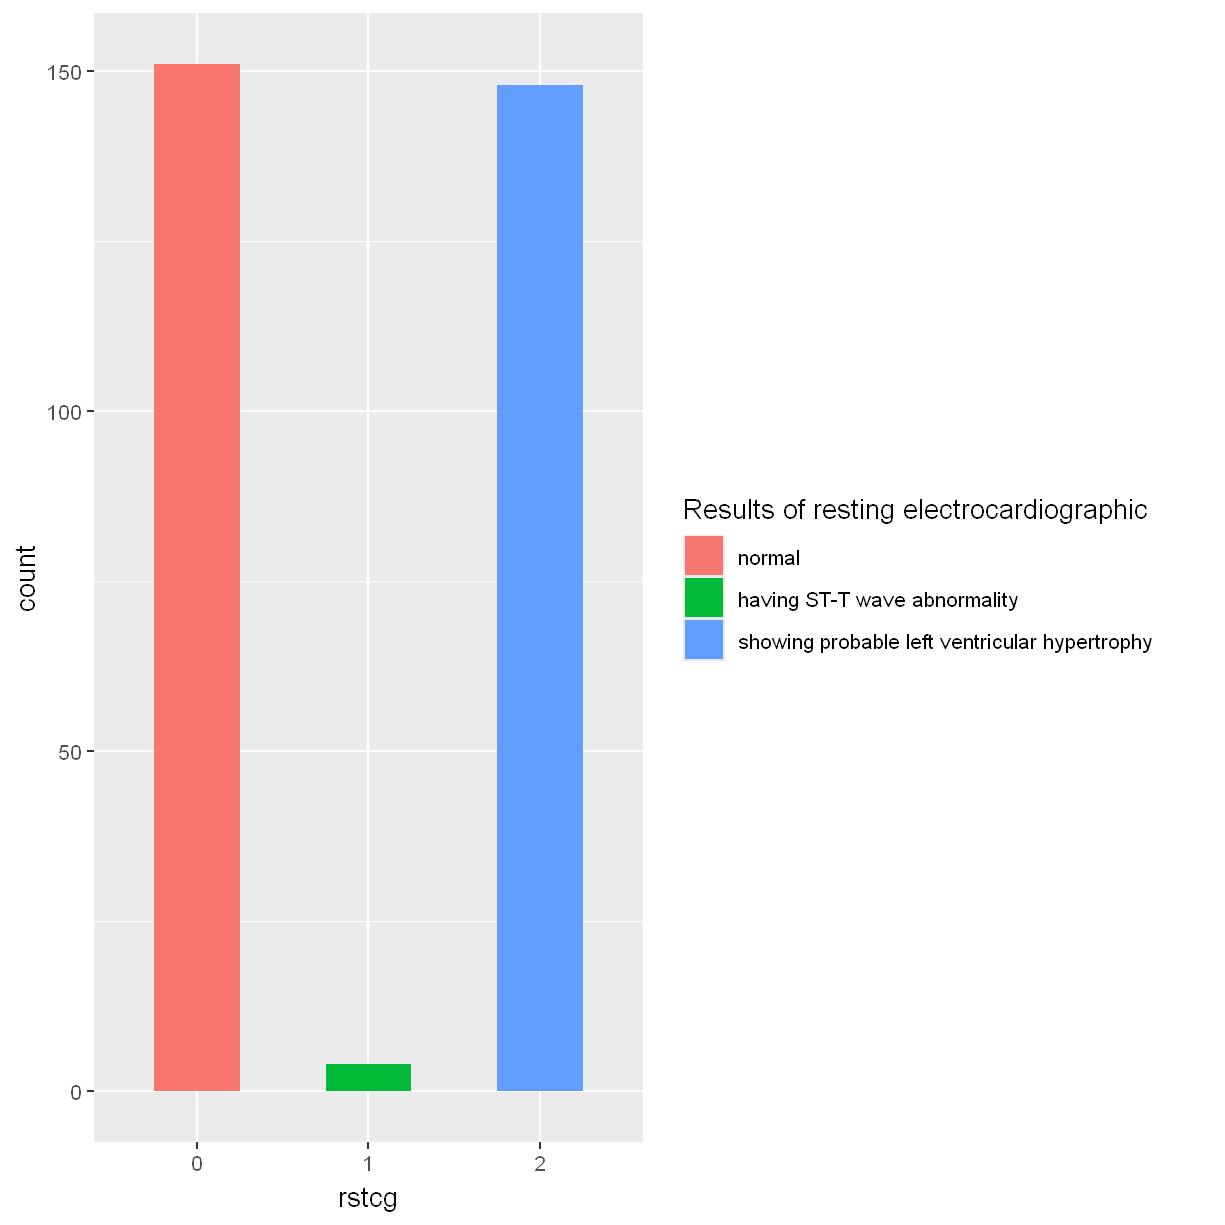

In [390]:
# Variation:rstcg
ggplot(data=df)+
    geom_bar(mapping=aes(x=rstcg,fill=rstcg),width=0.5)+
                labs(fill = "Results of resting electrocardiographic")+
                    scale_fill_discrete(labels=c("normal","having ST-T wave abnormality","showing probable left ventricular hypertrophy"))
          



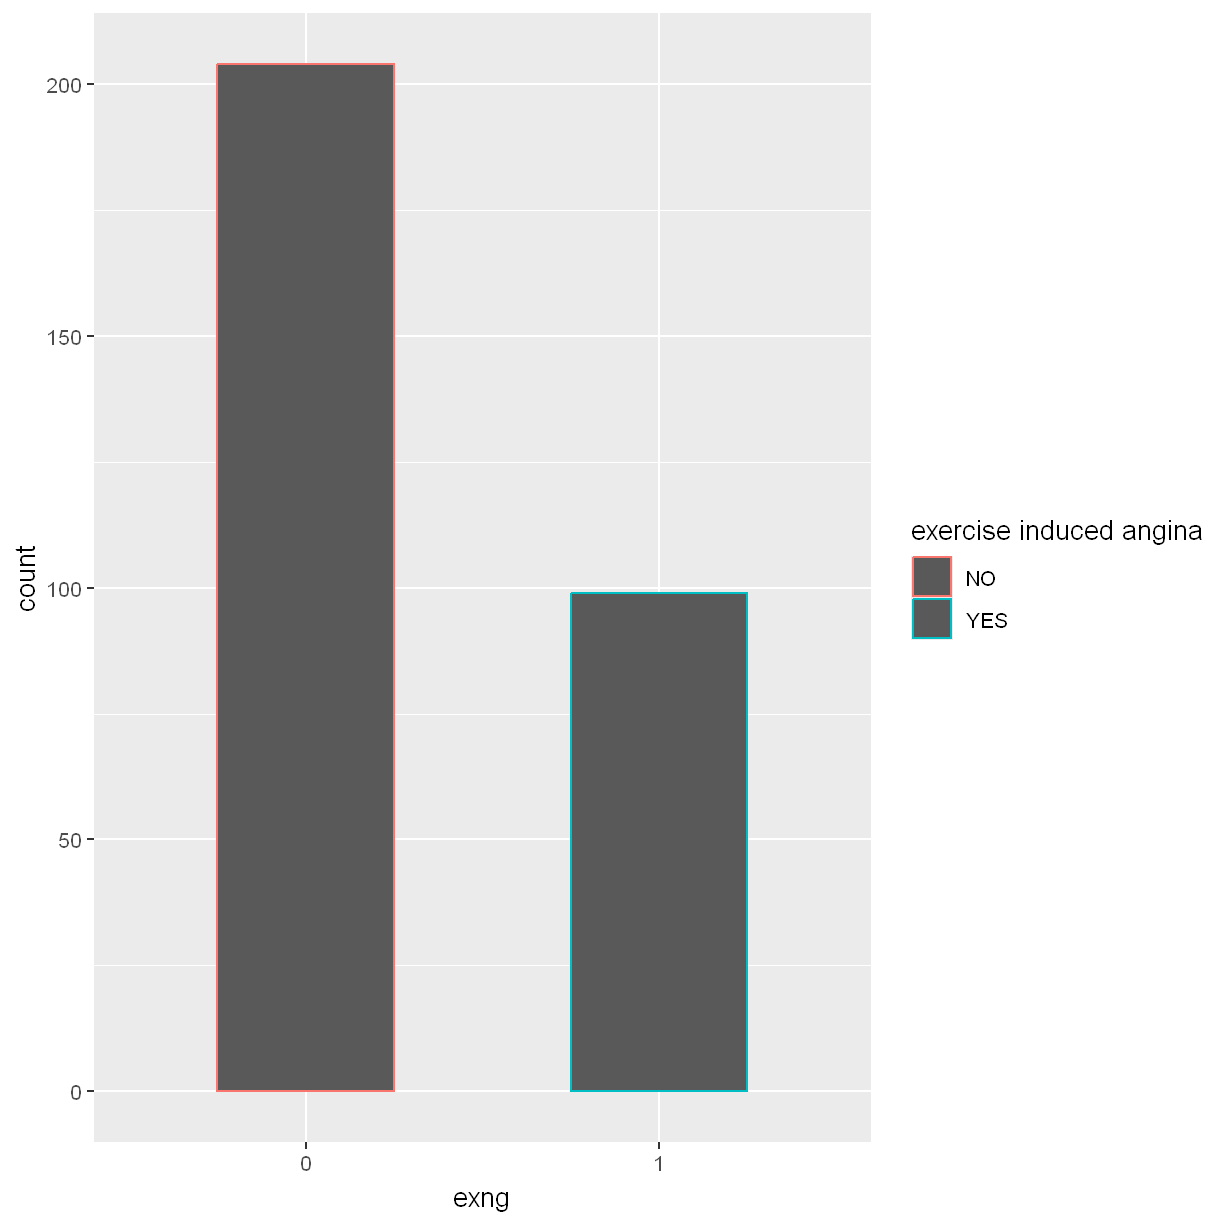

In [391]:
#exng: exercise induced angina
ggplot(data=df)+
    geom_bar(mapping=aes(x=exng,color=exng),show.legend = TRUE,width=0.5)+
            labs(color = "exercise induced angina")+
                scale_color_discrete(labels=c("NO","YES"))

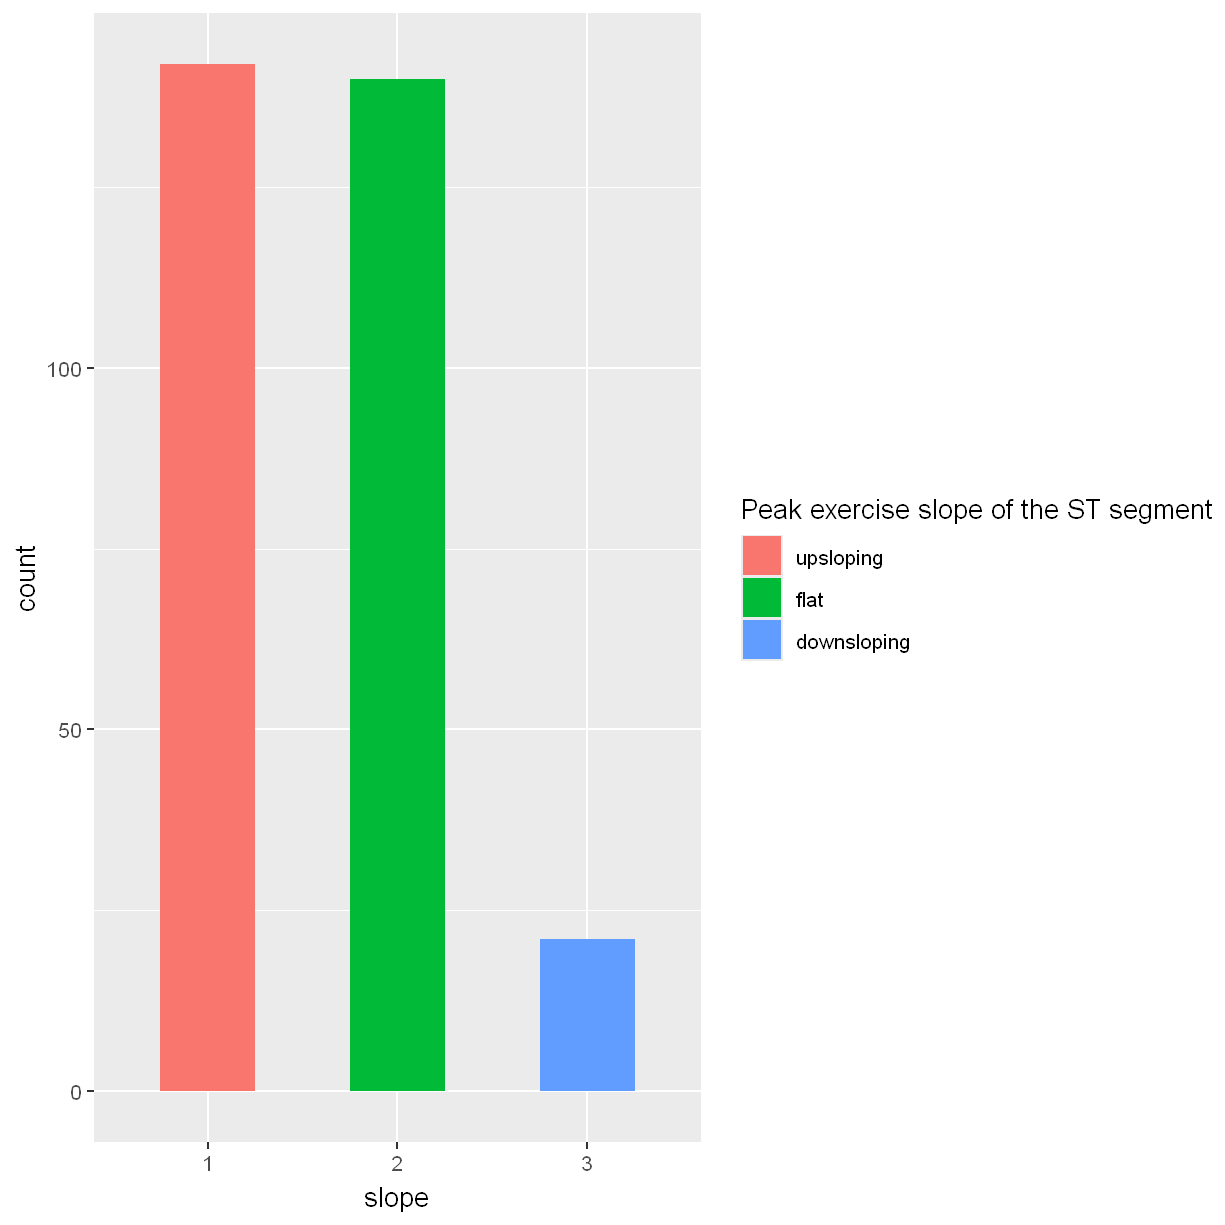

In [393]:
# Variation:slope
ggplot(data=df)+
    geom_bar(mapping=aes(x=slope,fill=slope),width=0.5)+
                labs(fill = "Peak exercise slope of the ST segment")+
                     scale_fill_discrete(labels=c("upsloping","flat","downsloping"))


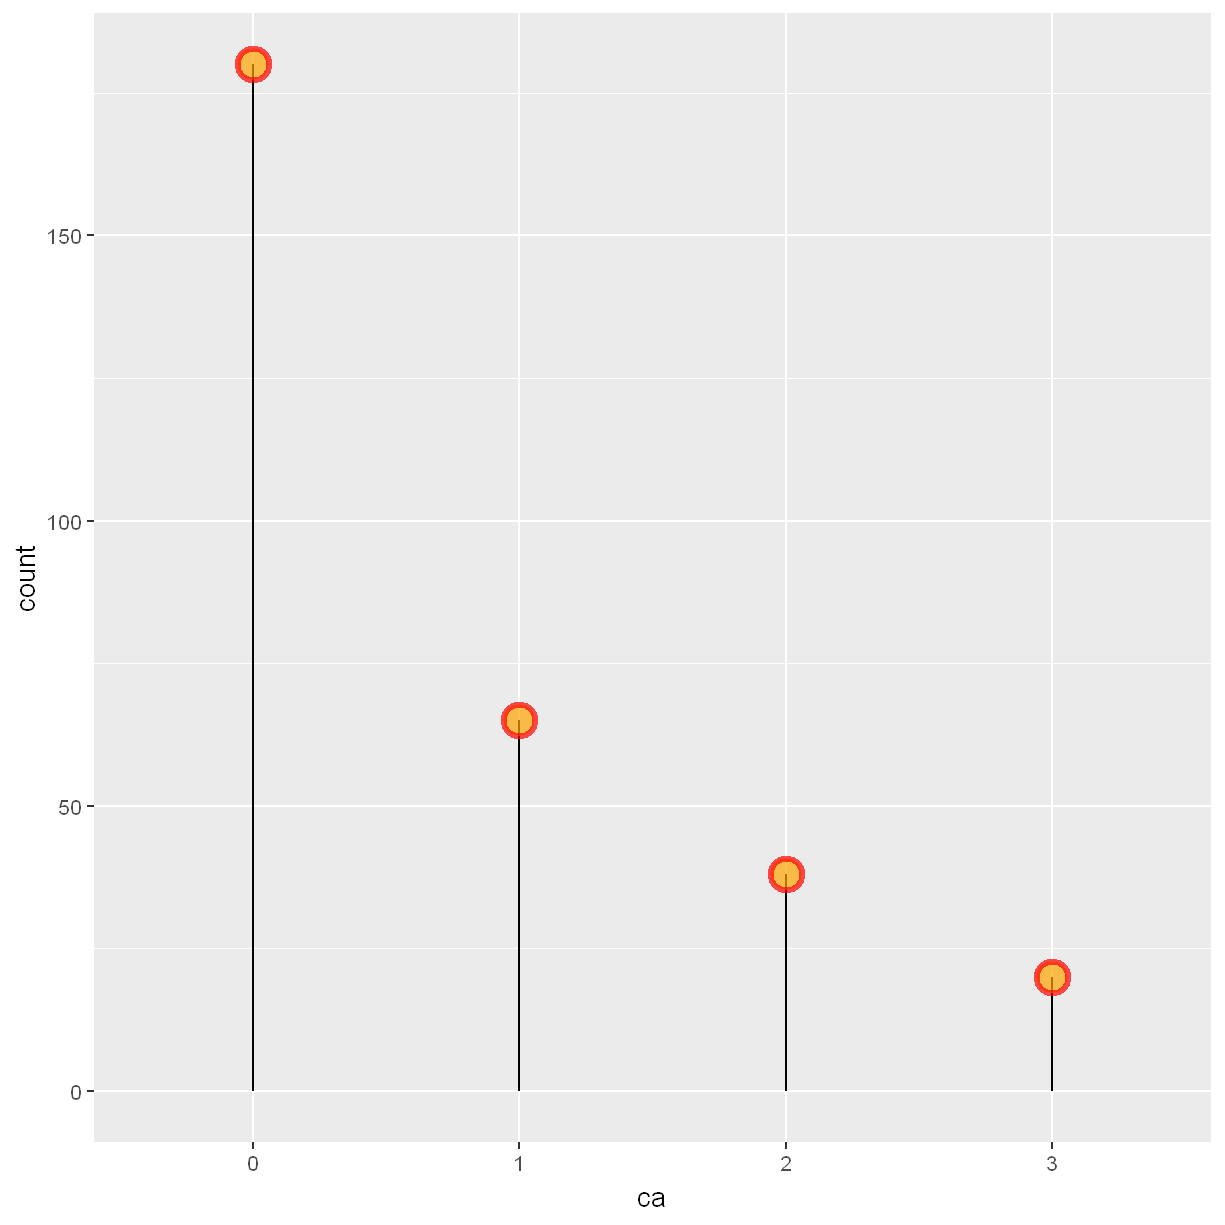

In [394]:
# Variation:ca(Major vessel count (0–3) colored by fluorescence)
ca_count<-df%>%
    group_by(ca)%>%
        summarize(count=n())

#lollipop chart
ggplot(data=ca_count, aes(x=ca, y=count)) +
  geom_segment( aes(x=ca, xend=ca, y=0, yend=count)) +
      geom_point( size=5, color="red", fill=alpha("orange", 0.1), alpha=0.7, shape=21, stroke=2)
        

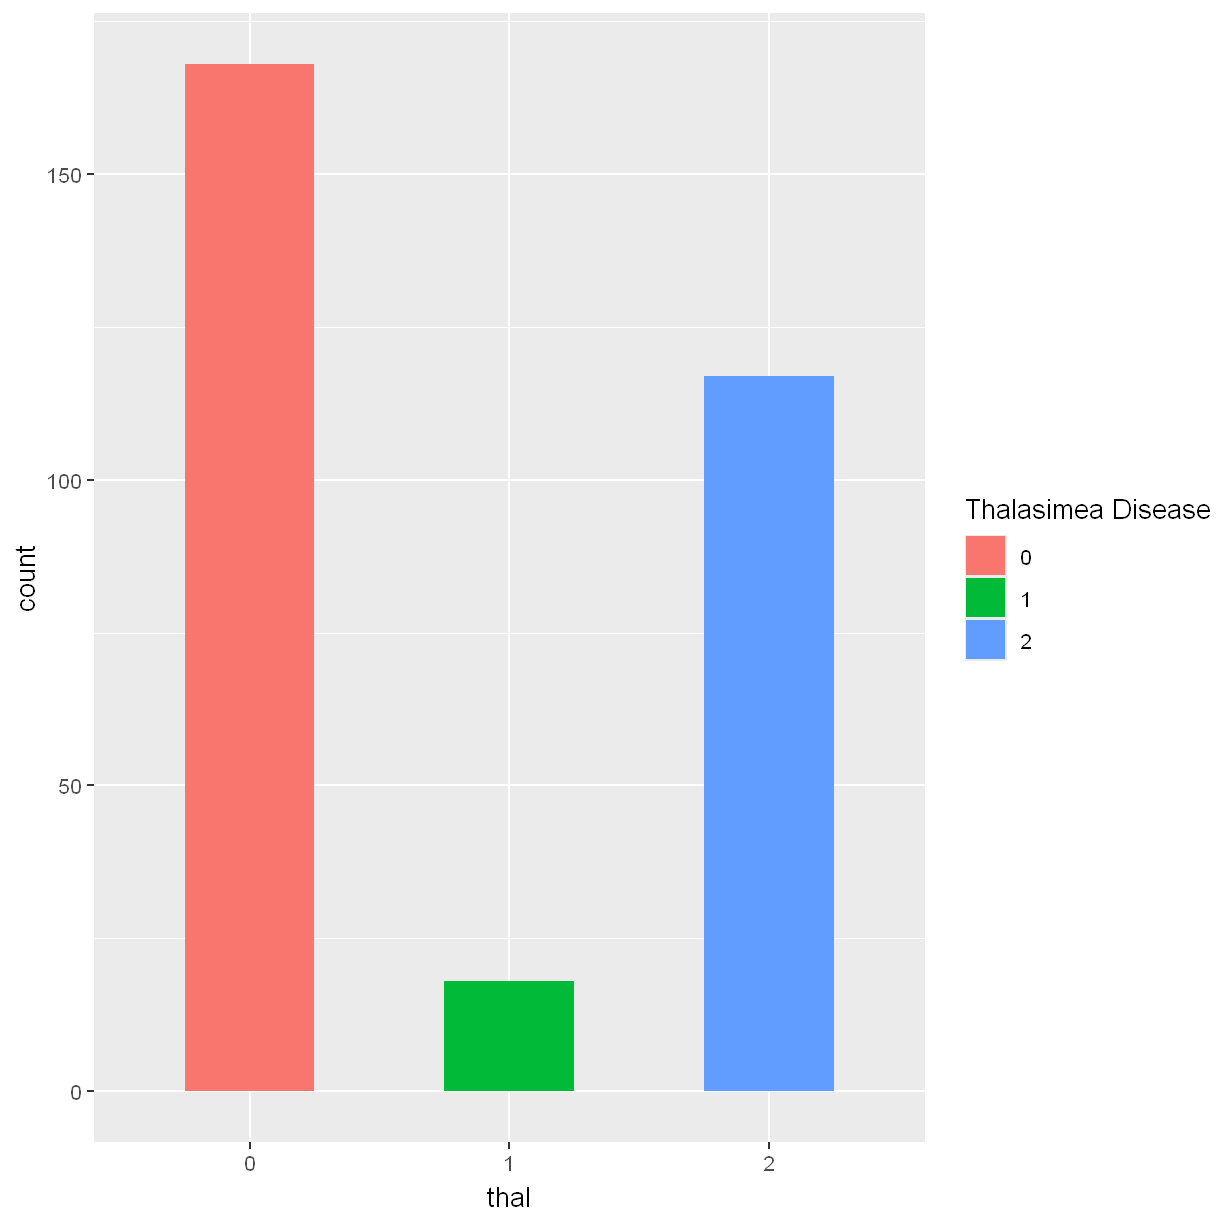

In [399]:
#Variation:Thalasimea Disease
ggplot(data=df)+
    geom_bar(mapping=aes(x=thal,fill=thal),width=0.5)+
                labs(fill = "Thalasimea Disease")


#### Covariation:
If variation describes the behavior within a variable, covariation
describes the behavior between variables. Covariation is the tendency
for the values of two or more variables to vary together in a
related way.

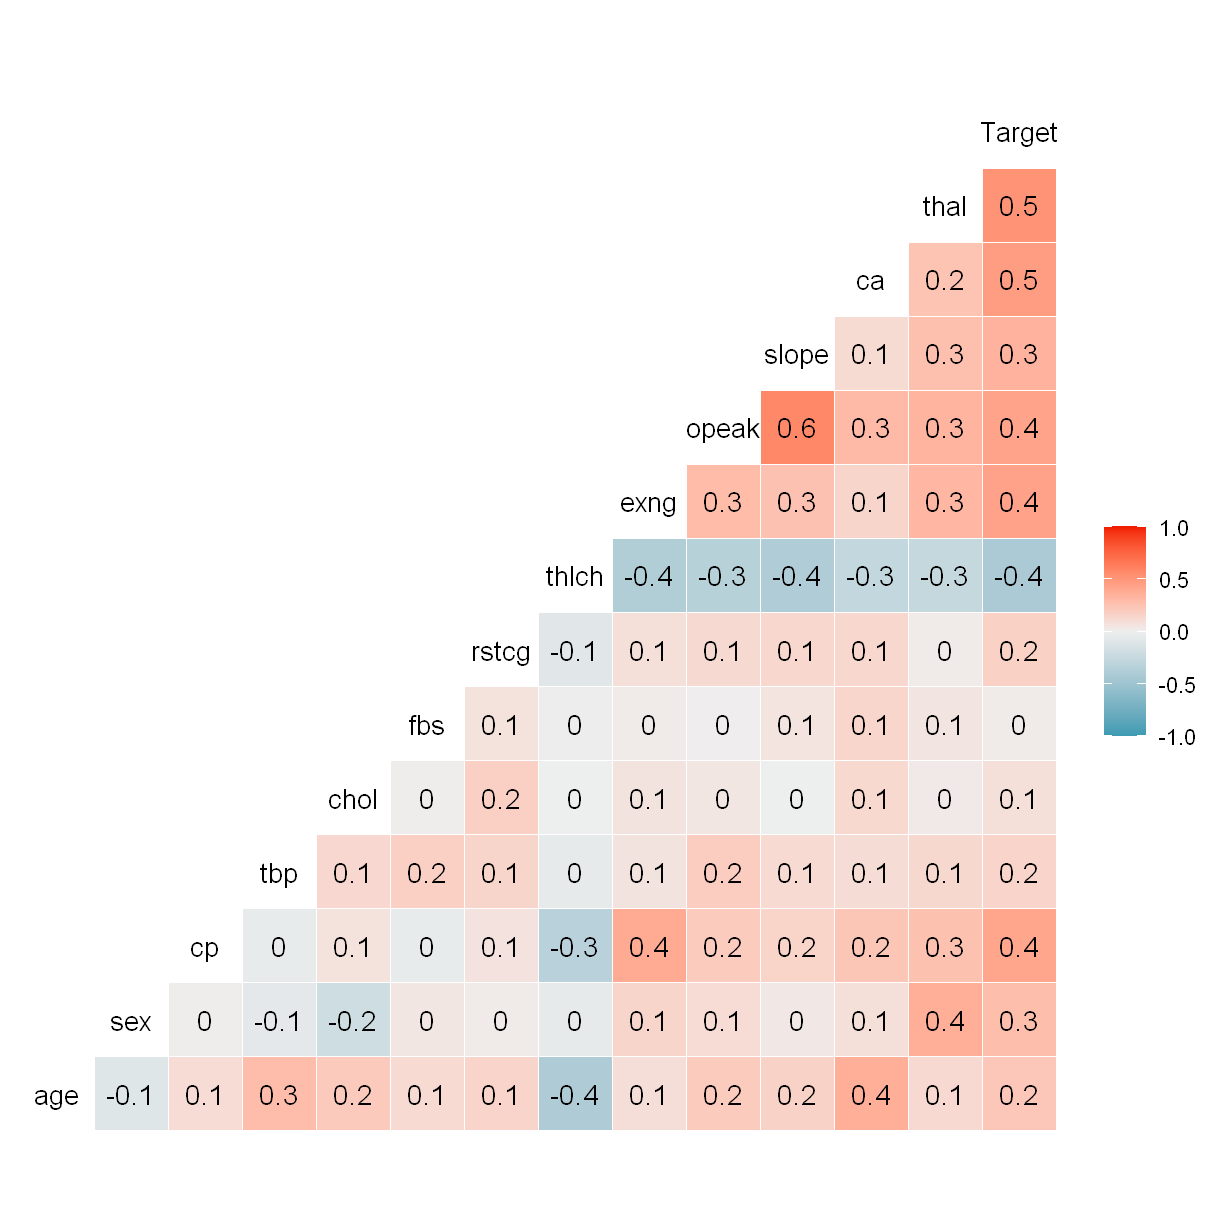

In [40]:
#Correlation Matrix 
ggcorr(df,method = c("pairwise", "pearson"),label=TRUE)

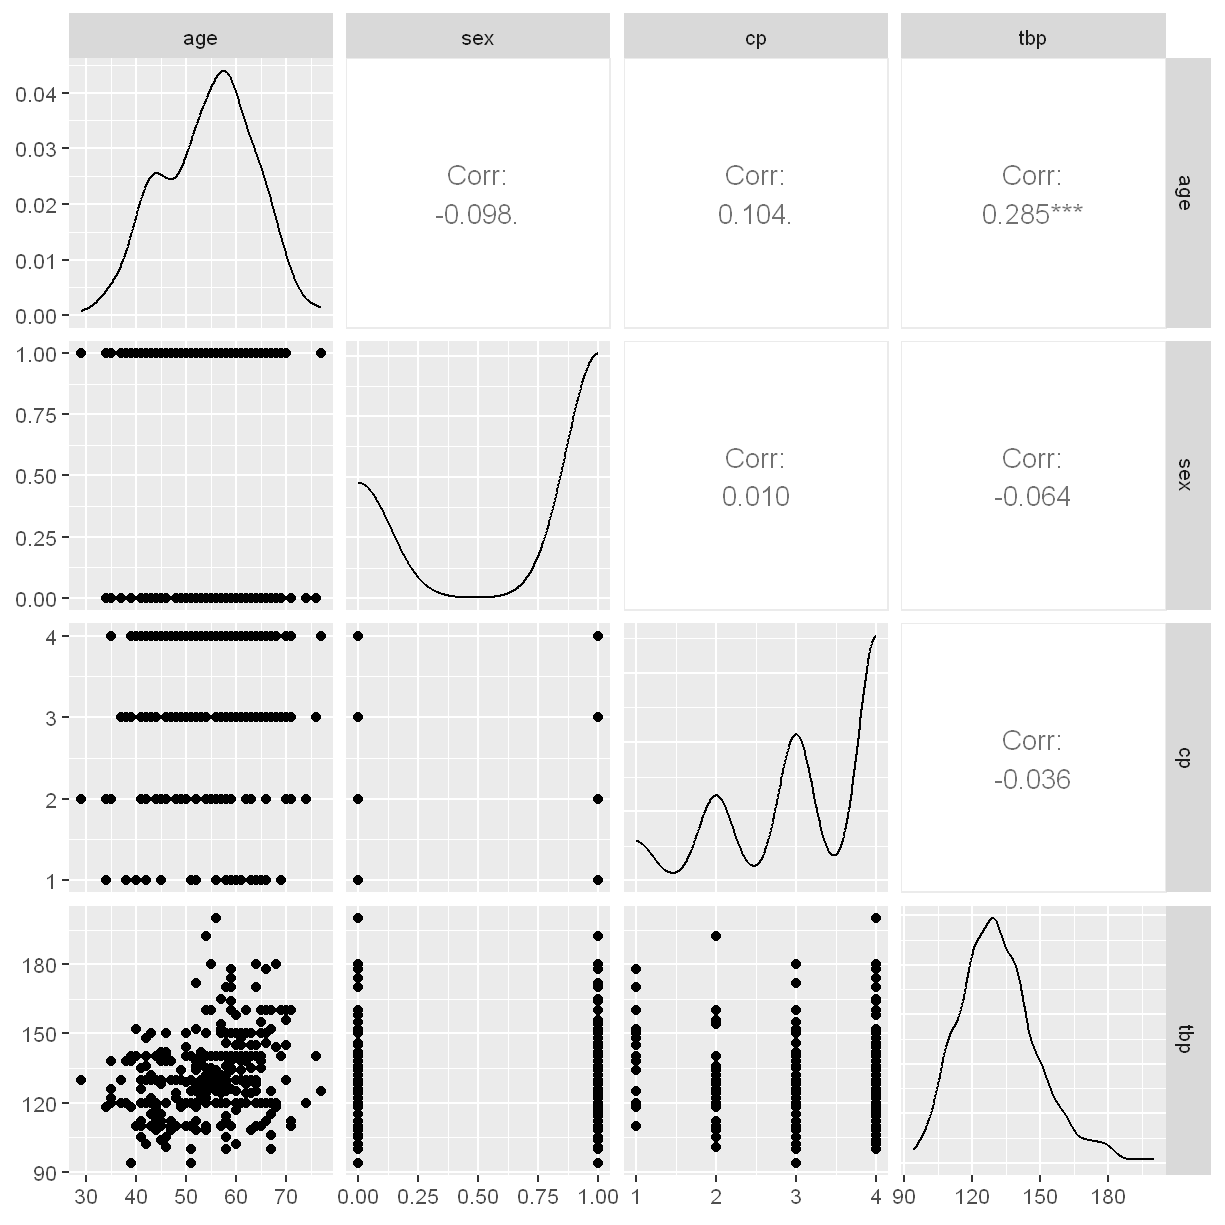

In [49]:
# ggpairs(data=df, columns = 1:4, upper = list(continuous = "cor", combo = "box_no_facet", discrete = "count"),
#   lower = list(continuous = "points", combo = "facethist", discrete = "facetbar")) 

ggpairs(data=df, columns = 1:4, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 




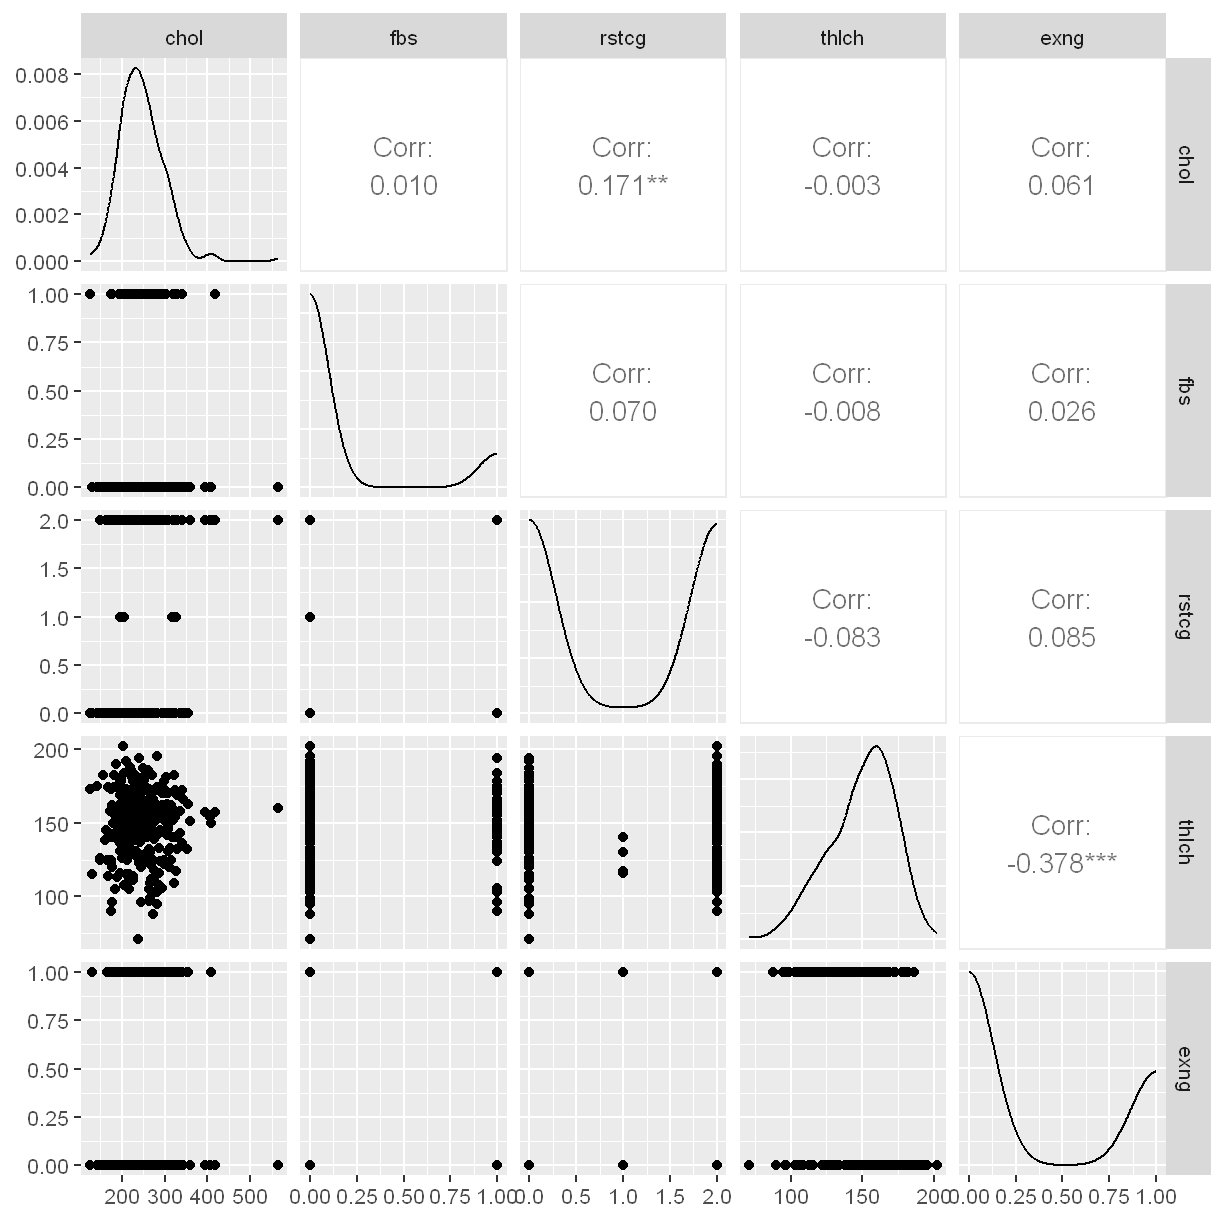

In [50]:
ggpairs(data=df, columns = 5:9, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 


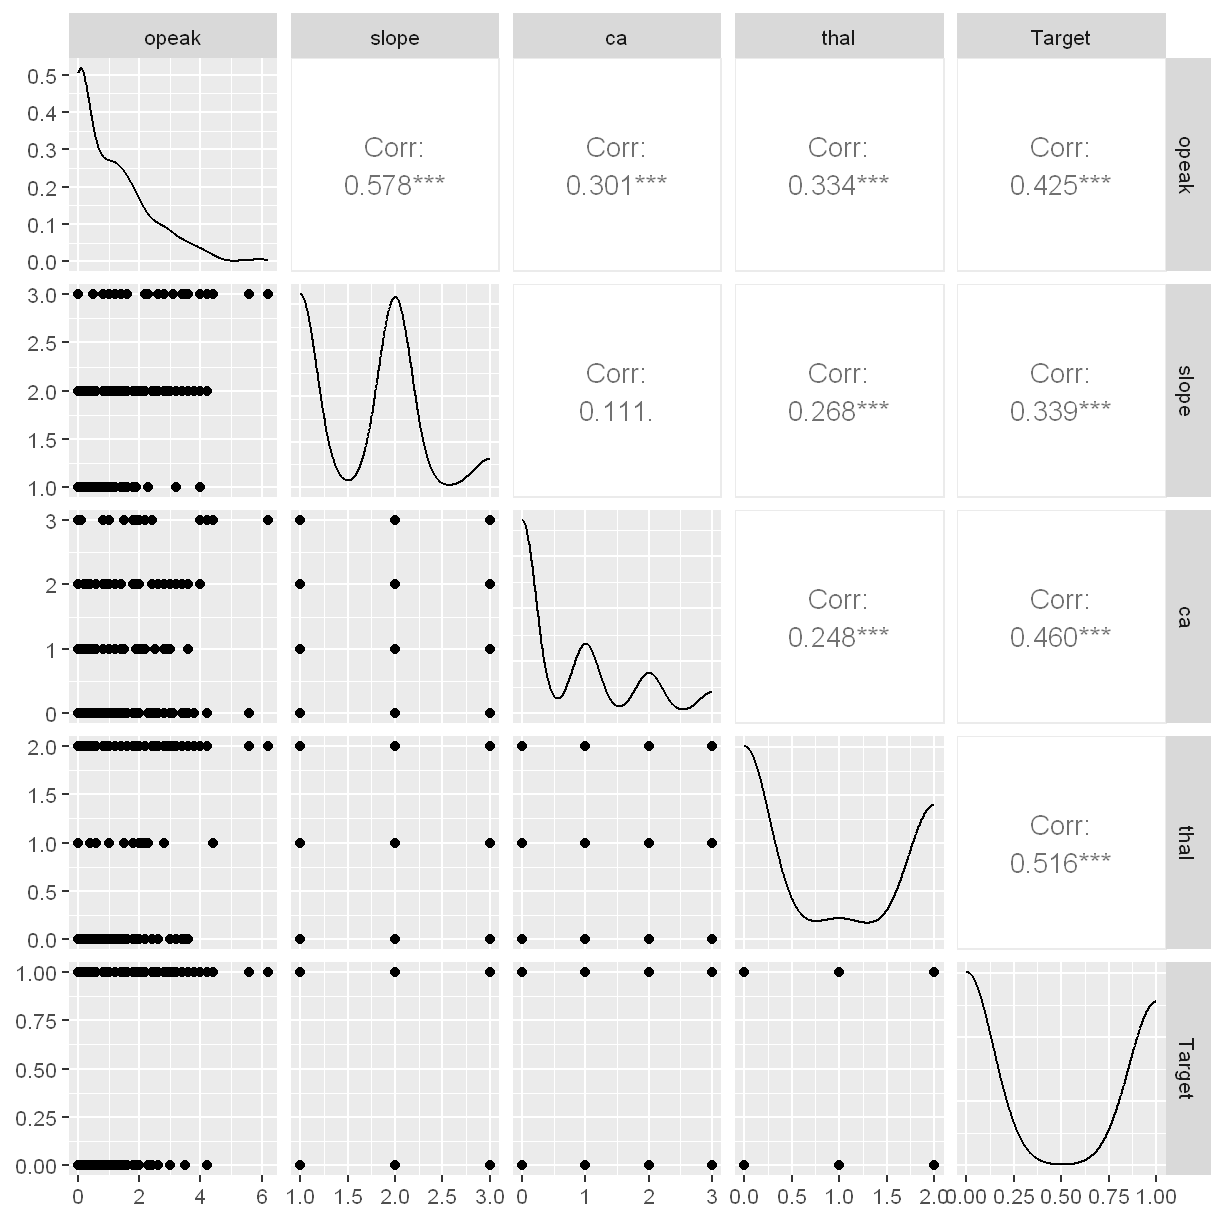

In [51]:
ggpairs(data=df, columns = 10:14, diag = list(continuous = "densityDiag", discrete = "barDiag", na = "naDiag") ) 